In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix

In [3]:
### read datasets
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

test_cpy=test.copy()

In [4]:
round((test.isnull().sum()/len(test.index))*100,2)

Loan_ID              0.00
Gender               3.00
Married              0.00
Dependents           2.72
Education            0.00
Self_Employed        6.27
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           1.36
Loan_Amount_Term     1.63
Credit_History       7.90
Property_Area        0.00
dtype: float64

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###  Univariate analysis

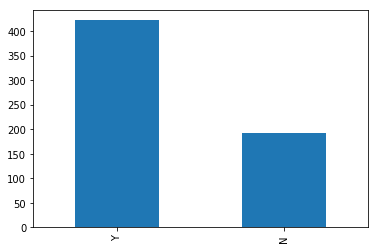

In [11]:
train['Loan_Status'].value_counts().plot.bar()

### Independent Variable (Categorical)

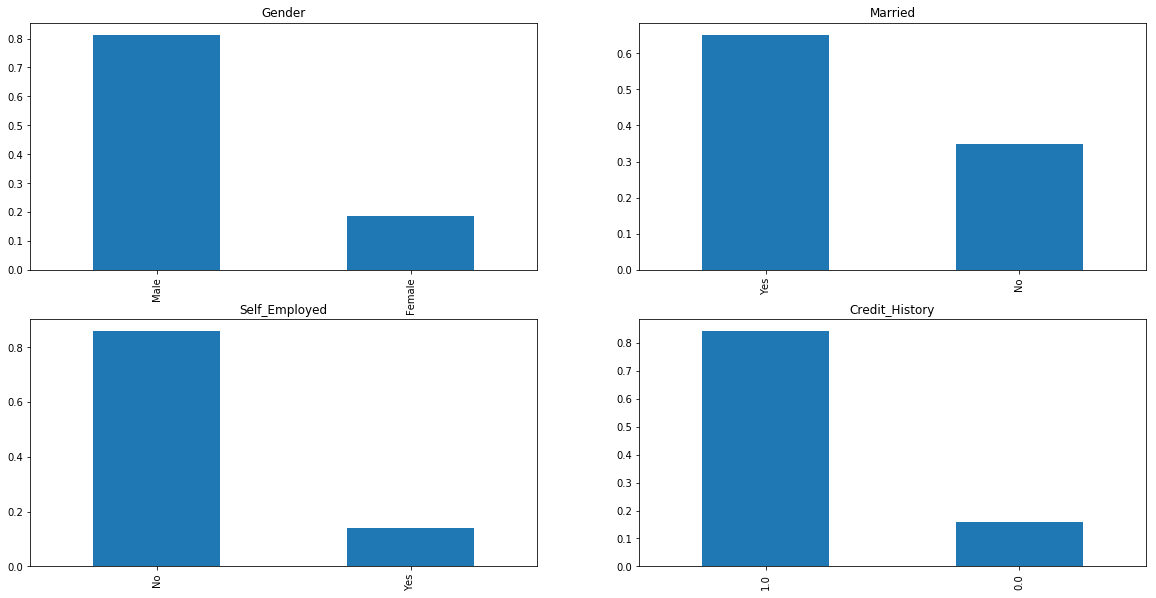

In [12]:
# Independent Variable (Categorical)

plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

In [13]:
# It can be inferred from the above bar plots that:

#     80% applicants in the dataset are male.
#     Around 65% of the applicants in the dataset are married.
#     Around 15% applicants in the dataset are self employed.
#     Around 85% applicants have repaid their debts.

### Independent Variable (Ordinal)

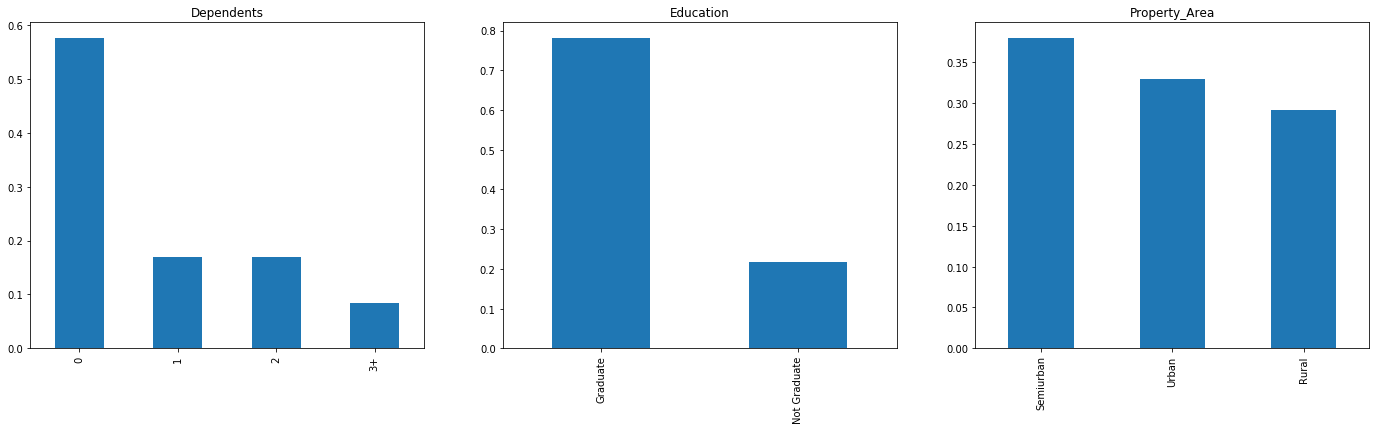

In [14]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [15]:
# Following inferences can be made from the above bar plots:

#     Most of the applicants don’t have any dependents.
#     Around 80% of the applicants are Graduate.
#     Most of the applicants are from Semiurban area.

### Independent Variable (Numerical)

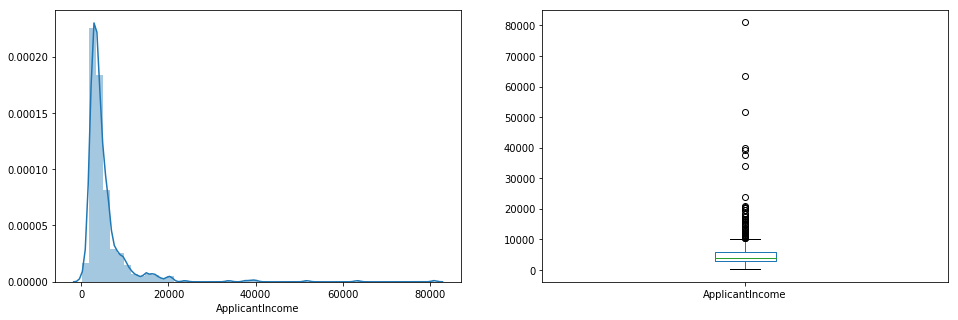

In [16]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

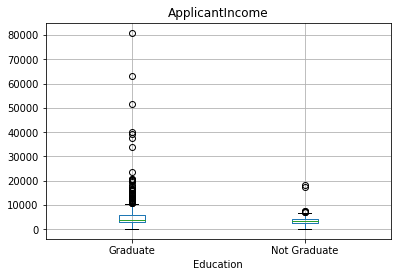

In [17]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

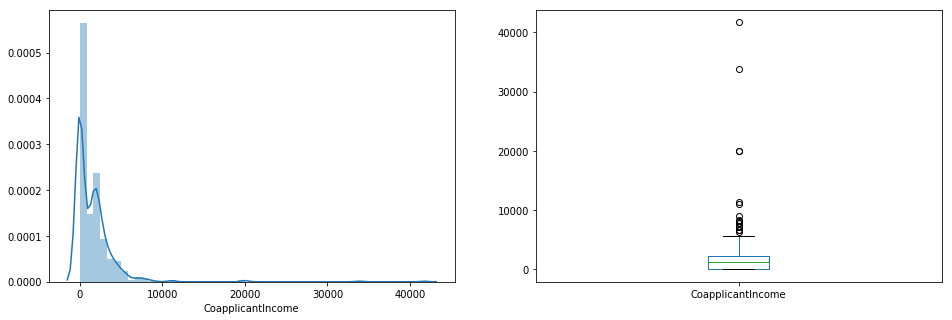

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

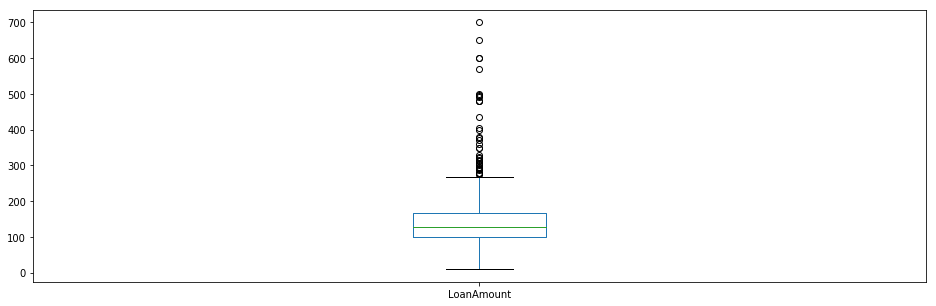

In [19]:
# Let’s look at the distribution of LoanAmount variable.

train['LoanAmount'].plot.box(figsize=(16,5)) 

### Categorical Independent Variable vs Target Variable

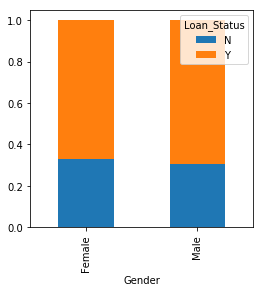

In [20]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# It can be inferred that the proportion of male and female applicants 
# is more or less same for both approved and unapproved loans.

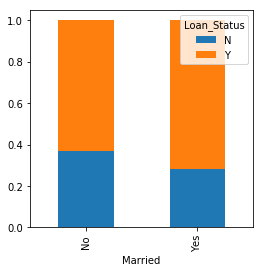

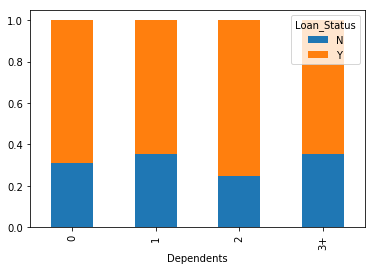

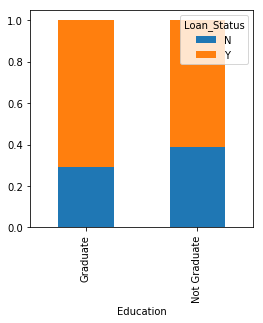

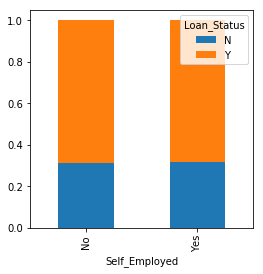

In [21]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()


#  Proportion of married applicants is higher for the approved loans.
#  Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
#  There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

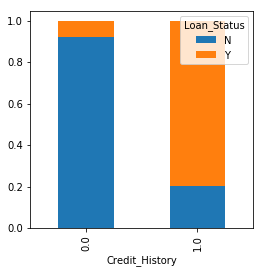

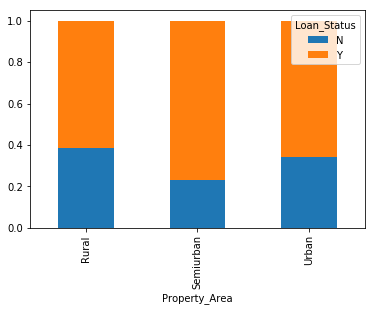

In [22]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

#  It seems people with credit history as 1 are more likely to get their loans approved.
#  Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

### Numerical Independent Variable vs Target Variable

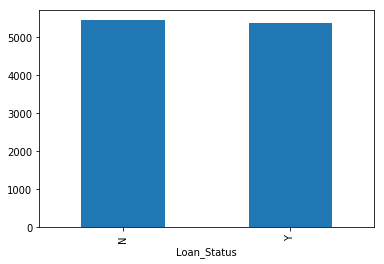

In [23]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

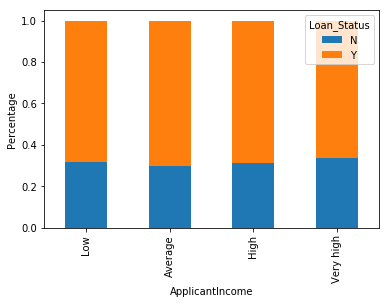

In [24]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

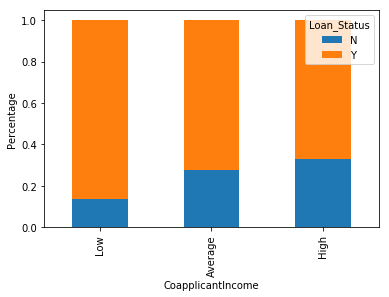

In [25]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')


# It shows that if coapplicant’s income is less the chances of loan approval are high. 
# But this does not look right. The possible reason behind this may be that most of the applicants don’t 
# have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not 
# dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s 
# income to visualize the combined effect of income on loan approval.

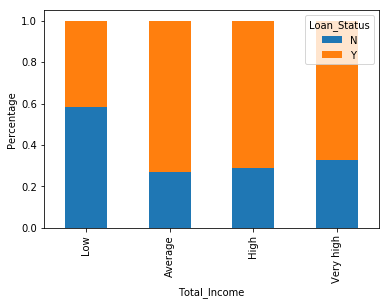

In [26]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')


# It can be seen that the proportion of approved loans is higher for Low and Average 
# Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that 
# the chances of loan approval will be high when the loan amount is less.

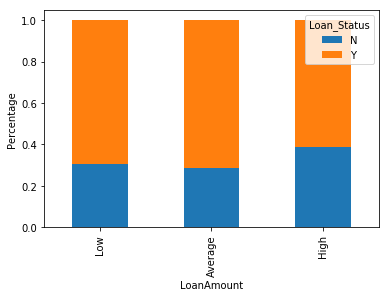

In [27]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [28]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

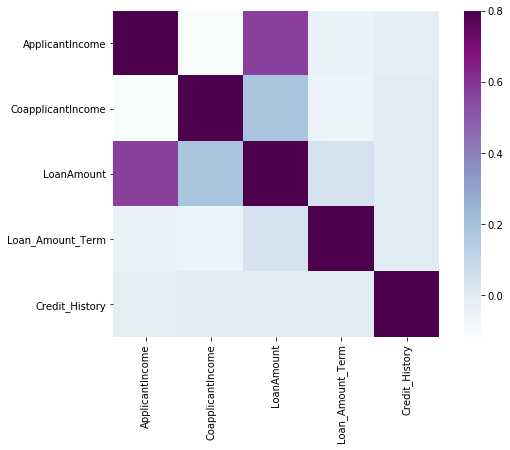

In [29]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

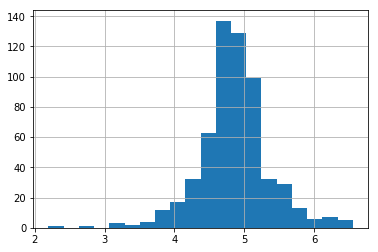

In [30]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 


In [31]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [32]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [33]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [34]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [35]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [36]:
train['Dependents'].value_counts()
train['Dependents']=train['Dependents'].fillna(0)
train['Dependents'].replace({'3+':3},inplace=True)

test['Dependents']=test['Dependents'].fillna(0)
test['Dependents'].replace({'3+':3},inplace=True)

In [37]:
train['Gender']=train['Gender'].map({'Male':1, 'Female': 0})
test['Gender']=test['Gender'].map({'Male':1, 'Female': 0})
train['Gender']=train['Gender'].fillna(1).astype('int')
test['Gender']=test['Gender'].fillna(1).astype('int')

train['Self_Employed']=train['Self_Employed'].map({'Yes':1, 'No': 0})
test['Self_Employed']=test['Self_Employed'].map({'Yes':1, 'No': 0})
train['Self_Employed']=train['Self_Employed'].fillna(0).astype(int)
test['Self_Employed']=test['Self_Employed'].fillna(0).astype(int)

train['Married']=train['Married'].map({'Yes':1, 'No': 0})
test['Married']=test['Married'].map({'Yes':1, 'No': 0})
train['Married']=train['Married'].fillna(1).astype('int')


train['Education']=train['Education'].map({'Graduate':1, 'Not Graduate': 0})
test['Education']=test['Education'].map({'Graduate':1, 'Not Graduate': 0})

train['Loan_Status']=train['Loan_Status'].map({'Y':1, 'N': 0})

In [38]:
train['Dependents']=train['Dependents'].astype(int)
test['Dependents']=test['Dependents'].astype(int)

In [39]:
# train_pa=pd.get_dummies(train['Property_Area'],drop_first=True)
# test_pa=pd.get_dummies(test['Property_Area'],drop_first=True)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['Property_Area']=le.fit_transform(train['Property_Area'])
test['Property_Area']=le.fit_transform(test['Property_Area'])

In [41]:
# train=pd.concat([train,train_pa],axis=1)
# test=pd.concat([test,test_pa],axis=1)

In [42]:
# train.drop(['Property_Area','Loan_ID'],axis=1,inplace=True)
# test.drop(['Property_Area','Loan_ID'],axis=1,inplace=True)

train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

In [43]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,1,NaN
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760


In [44]:
round((train.isnull().sum()/len(train.index))*100,2)

Gender               0.00
Married              0.00
Dependents           0.00
Education            0.00
Self_Employed        0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
LoanAmount_log       3.58
dtype: float64

In [45]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,4.700480
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,4.836282
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,5.337538
3,1,1,2,1,0,2340,2546,100.0,360.0,NaN,2,4.605170
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,4.356709


In [46]:
test.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
LoanAmount_log        5
dtype: int64

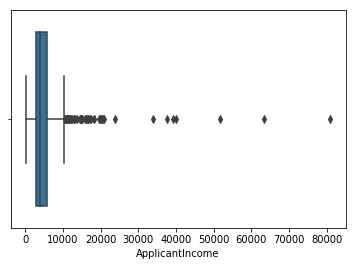

In [47]:
sns.boxplot(x=train['ApplicantIncome'])

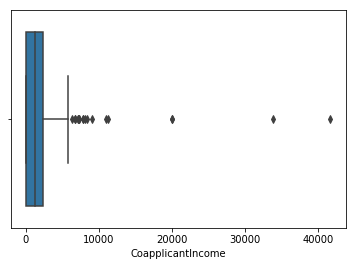

In [48]:
sns.boxplot(x=train['CoapplicantIncome'])

In [49]:
# Q1 = train.ApplicantIncome.quantile(0.25)
# Q3 = train.ApplicantIncome.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [50]:
# train_out = train[~((train['ApplicantIncome'] < (Q1 - 1.5 * IQR)) |(train['ApplicantIncome'] > (Q3 + 1.5 * IQR)))]
# train_out.shape

In [51]:
# Q1 = train.CoapplicantIncome.quantile(0.25)
# Q3 = train.CoapplicantIncome.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [52]:
# train_out1 = train_out[~((train_out['CoapplicantIncome'] < (Q1 - 1.5 * IQR)) |(train_out['CoapplicantIncome'] > (Q3 + 1.5 * IQR)))]
# train_out1.shape

In [53]:
# Q1 = train.LoanAmount.quantile(0.25)
# Q3 = train.LoanAmount.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [54]:
# train_out2 = train_out1[~((train_out1['LoanAmount'] < (Q1 - 1.5 * IQR)) |(train_out1['LoanAmount'] > (Q3 + 1.5 * IQR)))]
# train_out2.shape

In [55]:
# train_out2.describe()
train_out2=train

In [56]:
train_out2.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [57]:
train_out2['TotalIncome']=train_out2['ApplicantIncome']+train_out2['CoapplicantIncome']
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']




In [58]:
train_out2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,1,NaN,5849.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0


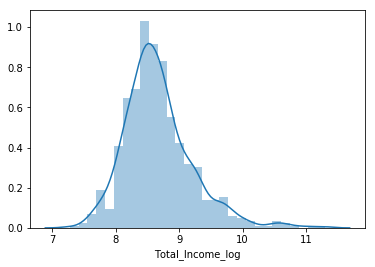

In [59]:
train_out2['Total_Income_log'] = np.log(train_out2['TotalIncome']) 
sns.distplot(train_out2['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['TotalIncome'])

In [60]:
train_out2.drop(['ApplicantIncome','CoapplicantIncome','TotalIncome','LoanAmount'],axis=1,inplace=True)
test.drop(['ApplicantIncome','CoapplicantIncome','TotalIncome','LoanAmount'],axis=1,inplace=True)

In [61]:
train_out2.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income_log
0,1,0,0,1,0,360.0,1.0,2,1,NaN,8.674026
1,1,1,1,1,0,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0,1,1,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0,0,0,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0,1,0,360.0,1.0,2,1,4.948760,8.699515


In [62]:
train_out2['LoanAmount_log']=train_out2['LoanAmount_log'].fillna(train_out2['LoanAmount_log'].median())
train_out2['Loan_Amount_Term']=train_out2['Loan_Amount_Term'].fillna(train_out2['Loan_Amount_Term'].mean())
train_out2['Credit_History']=train_out2['Credit_History'].fillna(train_out2['Credit_History'].mean())

test['LoanAmount_log']=test['LoanAmount_log'].fillna(test['LoanAmount_log'].median())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

In [63]:
### new variable EMI

train_out2['EMI']=train_out2['LoanAmount_log']/train_out2['Loan_Amount_Term']
test['EMI']=test['LoanAmount_log']/test['Loan_Amount_Term']

In [64]:
# Normalising continuous features
df = train_out2[['EMI','Total_Income_log']]
df_test = test[['EMI','Total_Income_log']]


In [65]:
df.head()

,EMI,Total_Income_log
0,0.013478,8.674026
1,0.013478,8.714568
2,0.011638,8.006368
3,0.013299,8.505323
4,0.013747,8.699515


In [66]:
normalized_df=(df-df.mean())/df.std()
normalized_df_test=(df_test-df_test.mean())/df_test.std()

In [67]:
normalized_df.head()

,EMI,Total_Income_log
0,-0.146198,0.008462
1,-0.146198,0.082836
2,-0.249447,-1.216372
3,-0.156258,-0.301027
4,-0.131120,0.055221


In [68]:
train_out2=train_out2.drop(['EMI','Total_Income_log','LoanAmount_log','Loan_Amount_Term'],axis=1)
# train_out2=train_out2.drop(['LoanAmount','Loan_Amount_Term'],axis=1)
df=pd.concat([normalized_df,train_out2],axis=1)

df.head(10)


,EMI,Total_Income_log,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,-0.146198,0.008462,1,0,0,1,0,1.0,2,1
1,-0.146198,0.082836,1,1,1,1,0,1.0,0,0
2,-0.249447,-1.216372,1,1,0,1,1,1.0,2,1
3,-0.156258,-0.301027,1,1,0,0,0,1.0,2,1
4,-0.131120,0.055221,1,0,0,1,0,1.0,2,1
5,-0.031595,0.919935,1,1,2,1,1,1.0,2,1
6,-0.192673,-0.759207,1,1,0,0,0,1.0,2,1
7,-0.113376,-0.091109,1,1,3,1,0,0.0,1,0
8,-0.103810,-0.093760,1,1,2,1,0,1.0,2,1
9,0.010153,2.583749,1,1,1,1,0,1.0,1,0


In [69]:
test=test.drop(['EMI','Total_Income_log','LoanAmount_log','Loan_Amount_Term'],axis=1)
# test=test.drop(['LoanAmount','Loan_Amount_Term'],axis=1)
test_df=pd.concat([normalized_df_test,test],axis=1)


In [70]:
test_df.head()

,EMI,Total_Income_log,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,-0.115770,0.072440,1,1,0,1,0,1.000000,2
1,-0.107587,-0.396630,1,1,1,1,0,1.000000,2
2,-0.077383,0.436005,1,1,2,1,0,1.000000,2
3,-0.121513,-0.258840,1,1,2,1,0,0.825444,2
4,-0.136485,-1.099155,1,0,0,0,0,1.000000,2


In [71]:
round((test_df.isnull().sum()/len(test_df.index))*100,2)

EMI                 0.0
Total_Income_log    0.0
Gender              0.0
Married             0.0
Dependents          0.0
Education           0.0
Self_Employed       0.0
Credit_History      0.0
Property_Area       0.0
dtype: float64

In [72]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=df.drop('Loan_Status',1)
y=df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs,acc=[],[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            accr=metrics.accuracy_score(y_test,y_test_pred)
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
            acc.append(accr)
    return sctr,scte,auc,ps,rs,acc

ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs,'accuracy':acc})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall,accuracy
0,Naive-Bayes,0.763431,0.810591,0.804878,0.783019,0.988095,0.804878
1,Random Forest,0.748168,0.983707,0.772358,0.811111,0.869048,0.772358
2,Ada boost,0.741606,0.835031,0.796748,0.792079,0.952381,0.796748
3,Bagging,0.736874,0.983707,0.747967,0.791209,0.857143,0.747967
4,Decistion Tree,0.710623,1.000000,0.764228,0.808989,0.857143,0.764228
5,Logistic Regression,0.670635,0.810591,0.804878,0.783019,0.988095,0.804878
6,bagged LR,0.663309,0.808554,0.804878,0.783019,0.988095,0.804878
7,KNN,0.656288,0.824847,0.691057,0.739583,0.845238,0.691057


### random forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()



In [74]:
rf.fit(X,y)

y_test_pred_rf=rf.predict(test_df)
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_rf,columns=['Loan_Status'])],1)
finalpred.to_csv("sub.csv",index=False)

### Decision trees

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

dt = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10), 'min_samples_leaf':np.arange(2,30), 'criterion':['entropy','gini']}
rscv = RandomizedSearchCV(dt, dt_params, cv=5, scoring='roc_auc')
rscv.fit(X, y)
print(rscv.best_params_)
rscv_best_DT=rscv.best_params_

DT=DecisionTreeClassifier(**rscv_best_DT)
DT.fit(X,y)
y_test_pred_DT=DT.predict(test_df)
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_DT,columns=['Loan_Status'])],1)
finalpred.to_csv("pred.csv",index=False)

{'min_samples_leaf': 8, 'max_depth': 9, 'criterion': 'entropy'}


C:\Users\Ankita Paithankar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### XGBOOST

In [76]:
import xgboost as xgb 
from xgboost.sklearn import XGBClassifier

In [77]:
xgb=XGBClassifier(learning_rate=0.09,n_estimators=125,max_depth=4,min_child_weight=4,colsample_bytree=0.5,reg_alpha=0.000001 )

In [78]:
xgb.fit(X,y)
y_test_pred_xgb=xgb.predict(test_df)
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_DT,columns=['Loan_Status'])],1)
finalpred.to_csv("xgb.csv",index=False)

### Logistic Regression

In [79]:
# from sklearn.feature_selection import RFE
# rfe = RFE(lm, 5)             # running RFE with 13 variables as output
# rfe = rfe.fit(X, y)

In [80]:
# rfe.support_

In [81]:
# list(zip(X.columns, rfe.support_, rfe.ranking_))

In [82]:
col = X.columns

In [83]:
# X.columns[~rfe.support_]

In [84]:
import statsmodels.api as sm
X_train=sm.add_constant(X[col])
lr=sm.GLM(y,X_train, family=sm.families.Binomial())
res=lr.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                            GLM   Df Residuals:                      604
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -289.06
Date:                Sat, 25 Jul 2020   Deviance:                       578.11
Time:                        18:07:35   Pearson chi2:                     620.
No. Iterations:                     5   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.0838      0.515     -5.993      0.000      -4.092      -2.075
EMI                 -0.0210      0.088     -0.238      0.812      -0.194       0.152
Total_Income_log    -0.0697      0.111     -0.630      0.528      -0.286       0.147
Gender              -0.1409      0.288     -0.490      0.624      -0.705       0.423
Married              0.5962      0.241      2.473      0.013       0.124       1.069
Dependents           0.0244      0.114      0.214      0.830      -0.199       0.248
Education            0.3328      0.255      1.307      0.191      -0.166       0.832
Self_Employed        0.0158      0.311      0.051      0.959      -0.593       0.625
Credit_History       3.8319      0.404      9.489      0.000       3.040       4.623
Property_Area        0.1080      0.134      0.807      0.420      -0.154       0.370
====================================================================================
"""

In [85]:
col=col.drop(['Dependents'],1)
X_train_1=sm.add_constant(X_train[col])
lr_1=sm.GLM(y,X_train_1,sm.families.Binomial())
res_1=lr_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                            GLM   Df Residuals:                      605
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -289.08
Date:                Sat, 25 Jul 2020   Deviance:                       578.16
Time:                        18:07:35   Pearson chi2:                     621.
No. Iterations:                     5   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.0719      0.511     -6.009      0.000      -4.074      -2.070
EMI                 -0.0212      0.088     -0.239      0.811      -0.195       0.152
Total_Income_log    -0.0679      0.110     -0.616      0.538      -0.284       0.148
Gender              -0.1392      0.288     -0.484      0.628      -0.703       0.425
Married              0.6122      0.230      2.667      0.008       0.162       1.062
Education            0.3280      0.253      1.294      0.196      -0.169       0.825
Self_Employed        0.0196      0.310      0.063      0.950      -0.588       0.627
Credit_History       3.8288      0.404      9.487      0.000       3.038       4.620
Property_Area        0.1081      0.134      0.808      0.419      -0.154       0.370
====================================================================================
"""

In [86]:
col=col.drop(['Gender'],1)
X_train_2=sm.add_constant(X_train_1[col])
lr_2=sm.GLM(y,X_train_2,sm.families.Binomial())
res_2=lr_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                            GLM   Df Residuals:                      606
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -289.20
Date:                Sat, 25 Jul 2020   Deviance:                       578.40
Time:                        18:07:35   Pearson chi2:                     620.
No. Iterations:                     5   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.1648      0.474     -6.675      0.000      -4.094      -2.236
EMI                 -0.0216      0.088     -0.245      0.807      -0.195       0.152
Total_Income_log    -0.0753      0.109     -0.690      0.490      -0.289       0.139
Married              0.5742      0.216      2.658      0.008       0.151       0.998
Education            0.3371      0.253      1.334      0.182      -0.158       0.832
Self_Employed        0.0253      0.310      0.082      0.935      -0.583       0.633
Credit_History       3.8237      0.403      9.488      0.000       3.034       4.614
Property_Area        0.1085      0.134      0.811      0.417      -0.154       0.371
====================================================================================
"""

In [87]:
col=col.drop(['Self_Employed'],1)
X_train_3=sm.add_constant(X_train_2[col])
lr_3=sm.GLM(y,X_train_3,sm.families.Binomial())
res_3=lr_3.fit()
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                            GLM   Df Residuals:                      607
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -289.20
Date:                Sat, 25 Jul 2020   Deviance:                       578.40
Time:                        18:07:35   Pearson chi2:                     620.
No. Iterations:                     5   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.1601      0.470     -6.717      0.000      -4.082      -2.238
EMI                 -0.0217      0.088     -0.245      0.806      -0.195       0.152
Total_Income_log    -0.0737      0.107     -0.686      0.493      -0.284       0.137
Married              0.5737      0.216      2.657      0.008       0.151       0.997
Education            0.3363      0.252      1.332      0.183      -0.158       0.831
Credit_History       3.8234      0.403      9.488      0.000       3.034       4.613
Property_Area        0.1084      0.134      0.810      0.418      -0.154       0.371
====================================================================================
"""

In [88]:
col=col.drop(['EMI'],1)
X_train_4=sm.add_constant(X_train_3[col])
lr_4=sm.GLM(y,X_train_4,sm.families.Binomial())
res_4=lr_4.fit()
res_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                            GLM   Df Residuals:                      608
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -289.23
Date:                Sat, 25 Jul 2020   Deviance:                       578.46
Time:                        18:07:36   Pearson chi2:                     619.
No. Iterations:                     5   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.1575      0.470     -6.712      0.000      -4.080      -2.235
Total_Income_log    -0.0752      0.107     -0.702      0.483      -0.285       0.135
Married              0.5720      0.216      2.651      0.008       0.149       0.995
Education            0.3371      0.252      1.336      0.182      -0.158       0.832
Credit_History       3.8232      0.403      9.482      0.000       3.033       4.613
Property_Area        0.1059      0.133      0.794      0.427      -0.156       0.367
====================================================================================
"""

In [89]:
# col=col.drop(['Property_Area'],1)
# X_train_5=sm.add_constant(X_train_4[col])
# lr_5=sm.GLM(y,X_train_5,sm.families.Binomial())
# res_5=lr_5.fit()
# res_5.summary()

In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_4[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_4[col].values, i) for i in range(X_train_4[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Credit_History,4.22
2,Education,3.77
1,Married,2.50
4,Property_Area,2.48
0,Total_Income_log,1.05


In [91]:
y_train_pred=res_4.predict(X_train_4)

In [92]:
y_train_pred_final = pd.DataFrame({'actual_LS':y.values, 'LS_prob':y_train_pred})
y_train_pred_final.head()



,actual_LS,LS_prob
0,1,0.771020
1,0,0.827595
2,1,0.867402
3,1,0.813404
4,1,0.770399


In [93]:
y_train_pred_final['pred_LS']= y_train_pred_final.LS_prob.map(lambda x: 1 if x > 0.75 else 0)

In [94]:
print(metrics.accuracy_score(y_train_pred_final.actual_LS,y_train_pred_final.pred_LS))

0.7198697068403909


In [95]:
confusion=metrics.confusion_matrix(y_train_pred_final.actual_LS,y_train_pred_final.pred_LS)

In [96]:
confusion

array([[117,  75],
       [ 97, 325]], dtype=int64)

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.actual_LS, y_train_pred_final.LS_prob, drop_intermediate = False )

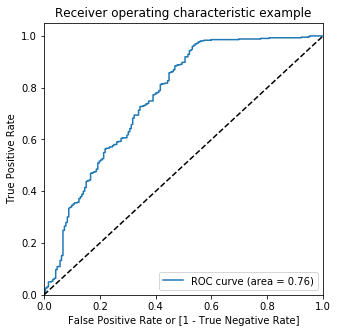

In [99]:
draw_roc(y_train_pred_final.actual_LS, y_train_pred_final.LS_prob)

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.LS_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,actual_LS,LS_prob,pred_LS,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.771020,1,1,1,1,1,1,1,1,1,0,0
1,0,0.827595,1,1,1,1,1,1,1,1,1,1,0
2,1,0.867402,1,1,1,1,1,1,1,1,1,1,0
3,1,0.813404,1,1,1,1,1,1,1,1,1,1,0
4,1,0.770399,1,1,1,1,1,1,1,1,1,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.actual_LS, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.687296  1.000000  0.000000
0.1   0.1  0.775244  0.985782  0.312500
0.2   0.2  0.809446  0.983412  0.427083
0.3   0.3  0.809446  0.983412  0.427083
0.4   0.4  0.809446  0.983412  0.427083
0.5   0.5  0.809446  0.983412  0.427083
0.6   0.6  0.809446  0.976303  0.442708
0.7   0.7  0.770358  0.890995  0.505208
0.8   0.8  0.628664  0.559242  0.781250
0.9   0.9  0.312704  0.000000  1.000000


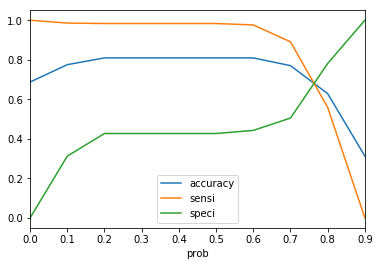

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### we will take 0.75 as the optimal cut off point

In [103]:
y_train_pred_final['pred_LS']= y_train_pred_final.LS_prob.map(lambda x: 1 if x > 0.73 else 0)

In [104]:
print(metrics.accuracy_score(y_train_pred_final.actual_LS,y_train_pred_final.pred_LS))

0.745928338762215


In [105]:
confusion=metrics.confusion_matrix(y_train_pred_final.actual_LS,y_train_pred_final.pred_LS)

In [106]:
confusion

array([[106,  86],
       [ 70, 352]], dtype=int64)

In [107]:
# X_test=test_df[col]
X_test=sm.add_constant(X_test[col])

In [108]:
y_test_pred_LR=res_4.predict(X_test)
# finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_rf,columns=['Loan_Status'])],1)
# finalpred.to_csv("sub.csv",index=False)
y_test_pred=y_test_pred_LR.map(lambda x: 1 if x > 0.73 else 0)
y_test_pred=y_test_pred.map(lambda x: 'Ý' if x==1 else 'N')
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred,columns=['Loan_Status'])],1)
finalpred.to_csv("LR.csv",index=False)

In [109]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          
                      intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          
                      penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          
                      verbose=0, warm_start=False)

lr.fit(X,y)


y_test_pred_lr=lr.predict(test_df)
# y_test_pred=y_test_pred_lr.map(lambda x: 'Ý' if x==1 else 'N')
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_lr,columns=['Loan_Status'])],1)
finalpred.to_csv("LR_1.csv",index=False)

In [110]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [111]:
# from sklearn.model_selection import GridSearchCV
# clf = LogisticRegression()
# grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
# grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
# grid_clf_acc.fit(X_train, y_train)

In [112]:
# #Predict values based on new parameters
# y_pred_acc = grid_clf_acc.predict(X_test)

# # New Model Evaluation metrics 
# print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))


# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_test,y_pred_acc)

In [113]:


print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 422
Before OverSampling, counts of label '0': 192 



Using TensorFlow backend.


After OverSampling, the shape of train_X: (844, 9)
After OverSampling, the shape of train_y: (844,) 

After OverSampling, counts of label '1': 422
After OverSampling, counts of label '0': 422


In [116]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          
                      intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          
                      penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          
                      verbose=0, warm_start=False)


lr.fit(X_train_res,y_train_res)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
# accuracy_score(y_test,y_test_p)

In [118]:
y_test_pred_lr=lr.predict(test_df)
# y_test_pred=y_test_pred_lr.map({'1': 'Y', '0':'N'})
finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_lr,columns=['Loan_Status'])],1)

finalpred.to_csv("LR_2.csv",index=False)

In [119]:
#set seed for same results everytime
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics

X=df.drop('Loan_Status',1)
y=df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X_train_res,y_train_res, test_size = 0.2, random_state =1)
#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs,acc=[],[],[],[],[],[]
def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            accr=metrics.accuracy_score(y_test,y_test_pred)
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
            acc.append(accr)
    return sctr,scte,auc,ps,rs,acc

ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs,'accuracy':acc})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall,accuracy
0,Bagging,0.893817,0.986667,0.828402,0.797468,0.828947,0.828402
1,Random Forest,0.883135,0.989630,0.781065,0.791045,0.697368,0.781065
2,KNN,0.807018,0.850370,0.757396,0.727273,0.736842,0.757396
3,Ada boost,0.788978,0.820741,0.739645,0.677778,0.802632,0.739645
4,Decistion Tree,0.771010,1.000000,0.781065,0.809524,0.671053,0.781065
5,bagged LR,0.712083,0.736296,0.686391,0.607477,0.855263,0.686391
6,Logistic Regression,0.710102,0.728889,0.680473,0.596491,0.894737,0.680473
7,Naive-Bayes,0.708829,0.720000,0.662722,0.579832,0.907895,0.662722


In [120]:
# from sklearn.ensemble import RandomForestClassifier

# rf=RandomForestClassifier()

# rf.fit(X_train_res,y_train_res)

# y_test_pred_rf=rf.predict(test_df)
# finalpred=pd.concat([test_cpy['Loan_ID'],pd.DataFrame(y_test_pred_rf,columns=['Loan_Status'])],1)
# finalpred.to_csv("RF_smote.csv",index=False)